# Time Series Classification Algorithms - (9) Image Based

<div style="border: 1px solid #007acc; background-color: #e6f4ff; padding: 10px; border-radius: 5px; color: black;">
  <strong>📘 Info:</strong> I do not claim ownership of the content in this notebook. It is based on official <a href="https://www.aeon-toolkit.org/en/latest/examples.html" target="_blank">aeon tutorials</a>, and parts of the code or text may have been copy-pasted or adapted directly from those or other sources for learning purposes.
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
import matplotlib.pyplot as plt

import numpy as np

import time

In [3]:
from aeon.datasets import load_classification

In [4]:
from pyts.image import (
    GramianAngularField,
    MarkovTransitionField,
    RecurrencePlot
)

In [5]:
DATASET_NAMES = [
    "MelbournePedestrian",
    "ArrowHead",
    "Colposcopy"
]

X_train_dict, y_train_dict = {}, {}
X_test_dict, y_test_dict = {}, {}

accuracy_dict, f1_score_dict, duration_dict = {}, {}, {}

for dataset_name in DATASET_NAMES: 
    X_train_dict[dataset_name], y_train_dict[dataset_name] = load_classification(
        dataset_name, split="train"
    )
    X_test_dict[dataset_name], y_test_dict[dataset_name] = load_classification(
        dataset_name, split="test"
    )

    X_train_dict[dataset_name] = X_train_dict[dataset_name].squeeze(1)
    X_test_dict[dataset_name] = X_test_dict[dataset_name].squeeze(1)

    accuracy_dict[dataset_name] = {}
    f1_score_dict[dataset_name] = {}
    duration_dict[dataset_name] = {}

```bibtex
@inbook{faouzi2024,
  author={Johann Faouzi},
  title={Time Series Classification: A Review of Algorithms and Implementations},
  year={2024},
  month={March},
  booktitle={Advances in Time Series Analysis and Forecasting},
  publisher={IntechOpen},
  isbn={978-0-85466-053-7},
  doi={10.5772/intechopen.1004810},
}
```

"In order to investigate temporal correlations between all the pairs of observations, several methods relying on transforming time series (i.e., vectors) into images (i.e., matrices) have been proposed." \cite{faouzi2024}

## 1. Recurrence Plot

```bibtex
@article{eckmann1987,
  author={J.-P. Eckmann and S. O. Kamphorst and D. Ruelle},
  title={Recurrence plots of dynamical systems},
  journal = {EPL (Europhysics Letters)},
  volume={4},
  number={9},
  pages={973--977},
  year={1987},
  publisher={IOP Publishing}
}
```

Proposed by \cite{eckmann1987}.

"A recurrence plot is an old technique that was originally introduced to visually inspect time constancy in dynamical systems through trajectories. A trajectory is defined as a subsequence of equally spaced values." \cite{faouzi2024}

$$
\vec{x}_i = \left( x_i, x_{i + \tau}, \ldots, x_{i + (m - 1)\tau} \right), \quad \forall i \in \{1, \ldots, n - (m - 1)\tau \}
$$

"where $m$ is the length of the trajectory and $\tau$ is the time delay, that is, the time gap between back-to-back time points in the trajectory." \cite{faouzi2024}

"A recurrence plot, denoted by $R$, is a matrix consisting of the binarized pairwise distances between all the pairs of trajectories from a time series:" \cite{faouzi2024}

$$
\forall i, j \in \{1, \ldots, n - (m - 1)\tau \}, \quad 
R_{ij} = \Theta\left( \varepsilon - \left\| \vec{x}_i - \vec{x}_j \right\|_2 \right)
$$

"where $\varepsilon$ is the threshold used to binarize the distance and Θ is the Heaviside step function, which is 1 for positive arguments and 0 for non-positive arguments. Visually, as a black-and-white image, a pixel is black if and only if the distance between the two considered trajectories is smaller than the threshold." \cite{faouzi2024}

<img src="images/09_recurrenceplot.png" style="width:600px; border: 1px solid #ccc; border-radius: 5px;">

"Recurrence plots have been used as a preprocessing step to classify time series." \cite{faouzi2024}

Recurrence Plot


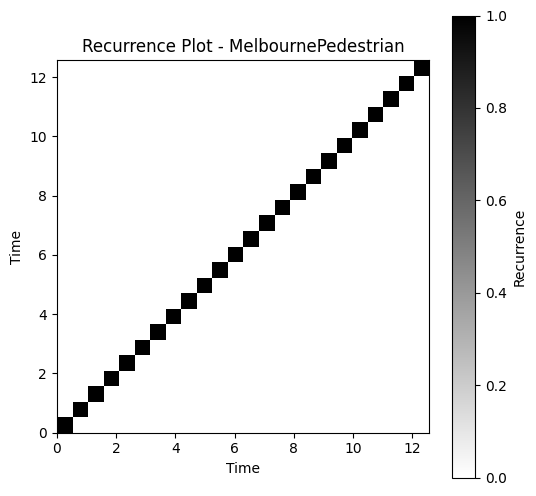

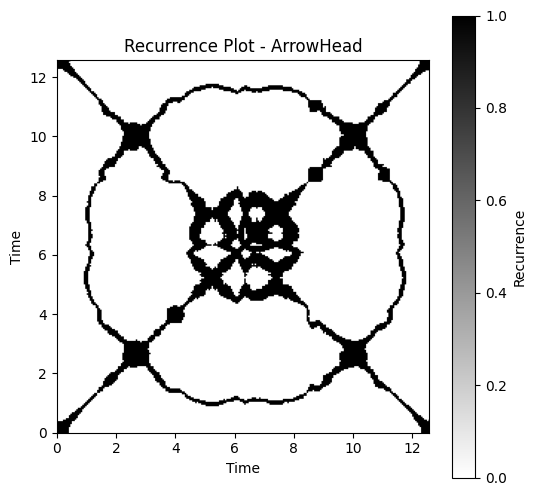

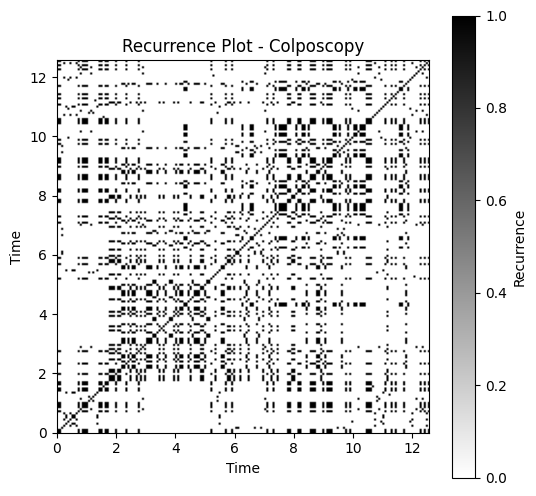

In [6]:
method = "Recurrence Plot"
print(method)

for dataset_name in DATASET_NAMES:
    start_time = time.time()

    rp = RecurrencePlot(threshold=np.pi/18)
    X_rp = rp.transform(X_train_dict[dataset_name])
    
    plt.figure(figsize=(6, 6))
    plt.imshow(X_rp[0], cmap='binary', origin='lower',
            extent=[0, 4 * np.pi, 0, 4 * np.pi])
    plt.xlabel('Time')
    plt.ylabel('Time')
    plt.title(f"Recurrence Plot - {dataset_name}")
    plt.colorbar(label='Recurrence')
    plt.show()

## 2. Gramian Angular Field

```bibtex
@inproceedings{wang2015,
  author={Zhengping Wang and Tim Oates},
  title={Imaging Time-Series to Improve Classification and Imputation},
  booktitle={Proceedings of the 24th International Joint Conference on Artificial Intelligence (IJCAI'15)},
  year={2015},
  pages={3939--3945},
  address={Buenos Aires, Argentina},
  publisher={AAAI Press},
  month={July},
}
```

Proposed by \cite{wang2015}.

"While recurrence plots consider phase space trajectories, another method, called the Gramian angular field and based on the polar coordinate representation of time series, was proposed." \cite{faouzi2024}

"A time series $X = (x_1, \ldots, x_n)$ of real-valued observations is first linearly rescaled into the range $[a, b]$ with $-1 \leq a < b \leq 1$:" \cite{faouzi2024}

$$
\forall i \in \{1, \ldots, n\}, \quad \tilde{x}_i = a + (b - a) \times \frac{x_i - \min(x)}{\max(x) - \min(x)} \tag{15}
$$

"The values of $a$ and $b$ may depend on the time series if the scale of the time series is important. Otherwise, the range is usually $[a, b] = [-1, 1]$ or $[a, b] = [0, 1]$." \cite{faouzi2024}

"The rescaled time series $\tilde{X}$ is then represented in polar coordinates with the radii depending on the time points and the angles depending on the values of the rescaled time series:" \cite{faouzi2024}

$$
\forall i \in \{1, \ldots, n\}, \quad r_i = \frac{i}{n} \tag{16}
$$

$$
\forall i \in \{1, \ldots, n\}, \quad \phi_i = \arccos(\tilde{x}_i) \tag{17}
$$

"Only the angles are considered since the radii do not depend on the values of the time series. A Gramian angular field measures temporal correlation by computing the trigonometric sum or difference between all the pairs of angles. When the trigonometric sum is applied, the Gramian angular field is called a Gramian angular summation field, while it is called a Gramian angular difference field* when the difference is applied. Let GASF be the matrix of a Gramian angular summation field and then GADF the matrix of a Gramian angular difference field. The entries of both matrices are computed using the following equations:" \cite{faouzi2024}

$$
\forall i, j \in \{1, \ldots, n\}, \quad \text{GASF}_{ij} = \cos(\phi_i + \phi_j) \tag{18}
$$

$$
\forall i, j \in \{1, \ldots, n\}, \quad \text{GADF}_{ij} = \sin(\phi_i - \phi_j) \tag{19}
$$

<img src="images/09_gramianangularfield.png" style="width:600px; border: 1px solid #ccc; border-radius: 5px;">

"Gramian angular fields have been used for time series classification as a preprocessing step to generate images used as input of a tiled convolutional neural network and of the pre-trained Inception v3 model followed by a multilayer perceptron." \cite{faouzi2024}


Gramian Angular Field


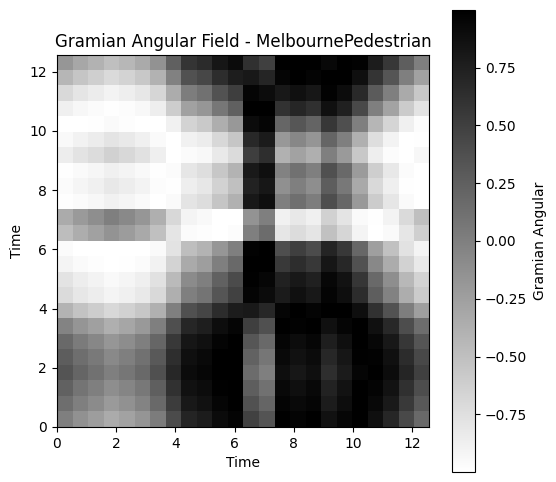

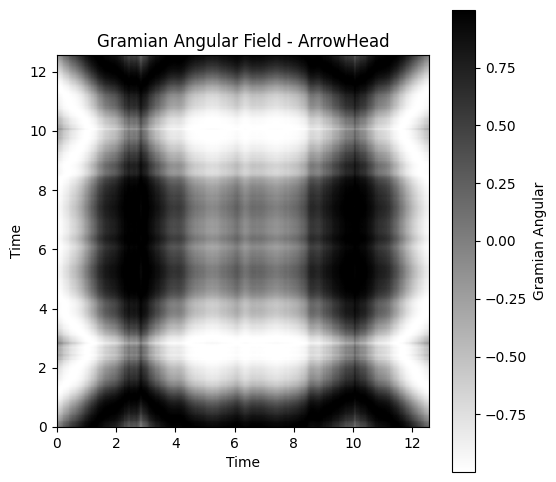

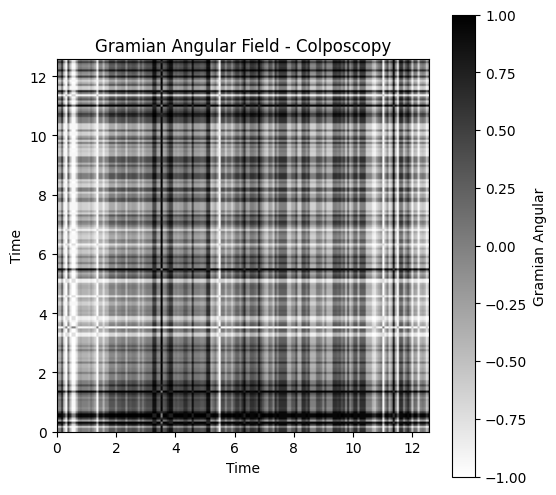

In [7]:
method = "Gramian Angular Field"
print(method)

for dataset_name in DATASET_NAMES:
    start_time = time.time()

    gasf = GramianAngularField(method='difference')
    X_gasf = gasf.fit_transform(X_train_dict[dataset_name])
    
    plt.figure(figsize=(6, 6))
    plt.imshow(X_gasf[0], cmap='binary', origin='lower',
            extent=[0, 4 * np.pi, 0, 4 * np.pi])
    plt.xlabel('Time')
    plt.ylabel('Time')
    plt.title(f"Gramian Angular Field - {dataset_name}")
    plt.colorbar(label='Gramian Angular')
    plt.show()

## 3. Markov Transition Field

```bibtex
@inproceedings{wang2015,
  author={Zhengping Wang and Tim Oates},
  title={Imaging Time-Series to Improve Classification and Imputation},
  booktitle={Proceedings of the 24th International Joint Conference on Artificial Intelligence (IJCAI'15)},
  year={2015},
  pages={3939--3945},
  address = {Buenos Aires, Argentina},
  publisher={AAAI Press},
  month={July},
}
```

Proposed by \cite{wang2015}.

"Another method consists in assimilating a time series, after discretization, as a Markov chain, and is called Markov transition field. A time series $X = (x_1, \ldots, x_n)$ of real-valued observations is first discretized based on its quantile bins; that is, each $x_i$ is assigned to its corresponding bin $q_j$, with $j \in \{1, \ldots, Q\}$ and $Q$ being the number of quantile bins, resulting in a discretize-valued time series of length $n$. By considering this discretize-valued time series as observations of a first-order Markov chain, one can compute the number of occurrences of pairs of back-to-back bins for every pair of bins, resulting in a $Q \times Q$ matrix. This matrix is then normalized to transform the frequencies into probabilities leading to the Markov transition matrix, whose entries give the probabilities of going from $q_j$ to $q_k$ for every pair $(q_j, q_k)$ of bins. The Markov transition matrix is insensitive to the temporal distribution of the time series $X$ since it only captures the frequencies of the transition, but not at which time points they occurred. Moreover, its size depends on the number of bins and not the length of the time series, although larger time series may allow for a larger number of bins." \cite{faouzi2024}

"To overcome these issues, the Markov transition matrix is projected onto a $n \times n$ matrix that is called the Markov transition field. Let $MTF$ be a Markov transition field and $q$ be the function that maps the real-valued observations of the time series into their bins. Each entry of the Markov transition field is an entry of the Markov transition matrix, and thus a transition probability. $MTF_{ij}$, that is, the Markov transition field entry for the pair $(x_i, x_j)$, is the probability of going from the bin associated to $x_i$, that is, $q(x_i)$, to the bin associated to $x_j$, that is, $q(x_j)$:" \cite{faouzi2024}

$$
\forall i, j \in \{1, \ldots, n\}, \quad MTF_{ij} = \mathbb{P}(q(x_j) \mid q(x_i)) \tag{22}
$$

<img src="images/09_markovtransitionfield.png" style="width:600px; border: 1px solid #ccc; border-radius: 5px;">

"Like Gramian angular fields, Markov transition fields have been used for time series classification as a preprocessing step to generate images then train a tiled convolutional neural network." \cite{faouzi2024}


Markov Transition Field


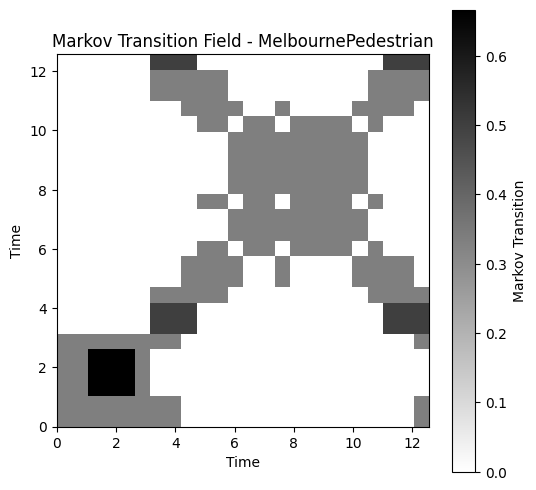

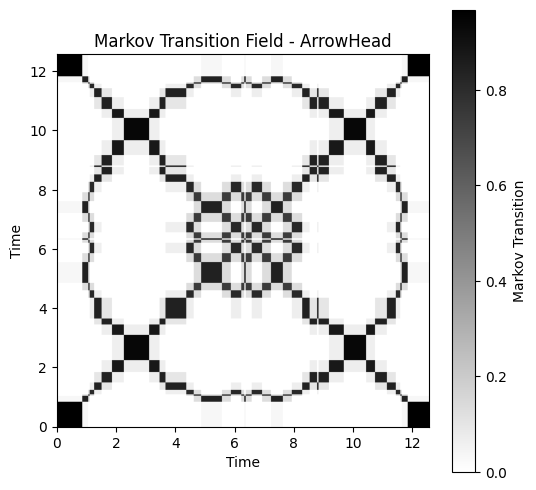

/Users/zamith/Doutorado/PhDStudies/.venv/lib/python3.9/site-packages/pyts/preprocessing/discretizer.py:168: UserWarning: Some quantiles are equal. The number of bins will be smaller for sample [ 0  1  2  3  5  8  9 16 20 23 26 27 29 32 38 39 45 46 49 50 52 57 58 60
 63 66 67 70 72 78 96]. Consider decreasing the number of bins or removing these samples.
  warn("Some quantiles are equal. The number of bins will "


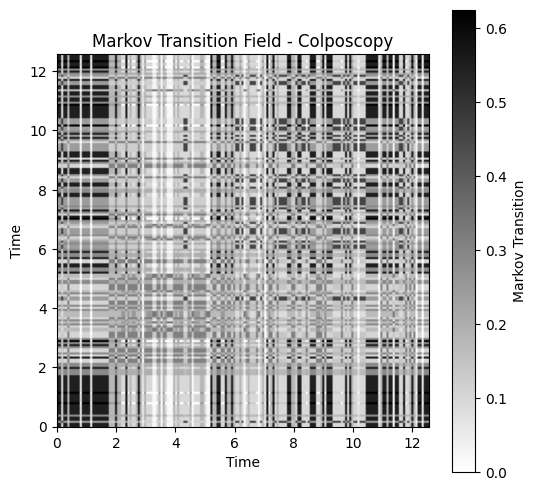

In [8]:
method = "Markov Transition Field"
print(method)

for dataset_name in DATASET_NAMES:
    start_time = time.time()

    mtf = MarkovTransitionField(n_bins=8)
    X_mtf = mtf.fit_transform(X_train_dict[dataset_name])
    
    plt.figure(figsize=(6, 6))
    plt.imshow(X_mtf[0], cmap='binary', origin='lower',
            extent=[0, 4 * np.pi, 0, 4 * np.pi])
    plt.xlabel('Time')
    plt.ylabel('Time')
    plt.title(f"Markov Transition Field - {dataset_name}")
    plt.colorbar(label='Markov Transition')
    plt.show()